# Redundancy analysis inside selected meta-analyses
Each meta-analysis is based on primary studies. In this notebook, we study the redundancy between meta-analysis:
- How many primary studies are shared between two meta-analysis?
- How many shared primary studies are included in each meta-analysis?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.simplefilter('ignore')

datadir = '../data/'
metadir = datadir + 'meta/'
outputdir = '../figures/'

## Extracting list of primary studies

For each meta-analysis we extracted the list of the primary studies it used. We extracted at least the first author name, publication date, publication title and DOI (when available). This process was semi-automated, often based on the supplementary materials available or the tables inside the paper. Information available were completed through requests throught the Cross-Ref database and manually checked. For each meta-analysis, a .xlsx file containing the list of the primary studies is available in the `data/meta/` folder.

## Redundancy analysis
See which studies are shared among different meta-analyses.

In [5]:
# fetch all meta-analysis
dfref = pd.read_excel(datadir + '../CLIMASOMA meta-analysis.xlsx', sheet_name='metaAnalysis', skiprows=2)

In [6]:
# load them all
metadic = {}
pubid = dfref['Publication ID'].values
for i in range(dfref.shape[0]):
    fname = dfref.loc[i, 'Publication ID']
    if fname != 'li2019': # skip it as it's the same as li2020
        metadic[fname] = {
                     'DOI': dfref.loc[i, 'DOI'],
                     'df': pd.read_excel(metadir + fname + '.xlsx')}
    
# build a big dataframe
dfall = pd.DataFrame()
for key in metadic.keys():
    df = metadic[key]['df']
    try:
        sdf = df[df['inMeta'] == 1][['author','year','title','DOI']]
        sdf['pubid'] = key
        a = sdf.shape[0]
        # to remove duplicates in the study itself
        sdf = sdf.groupby(['author','year','title']).first().reset_index()
        if a - sdf.shape[0] > 0:
            print('{:15s} removed {:2d} duplicates'.format(key, a - sdf.shape[0]))
        dfall = dfall.append(sdf)
    except Exception as e:
        print('error with', key, e)
dfall = dfall.reset_index(drop=True)
dfall['author'] = dfall['author'].str.lower()
#dfall['year'] = dfall['year'].astype(int)
dfall['title'] = dfall['title'].map(str).str.lower().str.strip()
dfall['title'] = [a[:-1] if a[-1] == '.' else a for a in dfall['title']]
dfall['DOI'] = dfall['DOI'].str.lower()
dfall.to_excel(metadir + 'allpub.xlsx', index=False)
dfall

bai2018         removed  1 duplicates
edeh2020        removed  1 duplicates
lee2019         removed 34 duplicates
meyer2019       removed  2 duplicates
peixoto2020     removed  2 duplicates
islam2021       removed  1 duplicates
du2018          removed  1 duplicates
cheng2021a      removed  6 duplicates
yu2021          removed  2 duplicates
cheng2021b      removed  5 duplicates
cheng2021c      removed  3 duplicates


,author,year,title,DOI,pubid
0,abiven,2009.0,the effects of organic inputs over time on soi...,10.1016/j.soilbio.2008.09.015,bai2018
1,alakukku,2009.0,grain yield and nutrient balance of spring cer...,10.1016/j.still.2011.10.015,bai2018
2,albiach,2001.0,organic matter components and aggregate stabil...,10.1016/s0960-8524(00)00090-0,bai2018
3,alvarez,1994.0,"soil organic carbon, microbial biomass and c02...",10.1016/0167-1987(94)00432-e,bai2018
4,arrigo,1993.0,cropping rotations: effect on aggregate stabil...,10.1080/00103629309368966,bai2018
...,...,...,...,...,...
3031,yazar,2003.0,sustainable use of highly saline water for irr...,None,cheng2021c
3032,zayton,2009.0,effect of water salinity and potassium fertili...,10.21608/mjae.2009.109866,cheng2021c
3033,zhai,2015.0,the effects of saline water drip irrigation on...,10.1371/journal.pone.0142204,cheng2021c
3034,zhai,2016.0,soil salt distribution and tomato response to ...,10.1371/journal.pone.0165985,cheng2021c


In [7]:
dfall = pd.read_excel(metadir + 'allpub.xlsx')

In [8]:
# number of NaN (missing DOI)
dfall.isna().sum()

author      0
year        0
title       0
DOI       431
pubid       0
dtype: int64

In [9]:
# number of NaN after grouping per title (missing DOI)
dfall.groupby('title').first().isna().sum()

author      0
year        0
DOI       403
pubid       0
dtype: int64

In [10]:
# number of study per meta-analysis
dfall.groupby('pubid').count().reset_index()

,pubid,author,year,title,DOI
0,bai2018,125,125,125,81
1,basche2017,26,26,26,26
2,basche2019,89,89,89,88
3,byrnes2018,63,63,63,60
4,cheng2021a,84,84,84,79
5,cheng2021b,69,69,69,35
6,cheng2021c,116,116,116,93
7,delonge2018,37,37,37,37
8,du2018,26,26,26,12
9,edeh2020,37,37,37,35


In [11]:
# publication with same author and year but different title
dfall['ucol'] = dfall['author'] + dfall['year'].map(str)
df = dfall.groupby('title').first().reset_index()
dfg = df.groupby('ucol')
dfc = dfg.count().reset_index()
dft = dfg.first().reset_index()
ie = dfc['title'] > 1
im = dfall['ucol'].isin(dfc[ie]['ucol'])
print(np.sum(im))
dfu = dfall[im].groupby('title').first().reset_index()
# irrigmeta = ['du2018', 'yu2020', 'cheng2021a', 'lu2019', 'yu2021', 'qin2016', 'cheng2021b', 'cheng2021c']
# ie = dfu['pubid'].isin(irrigmeta) | dfu['ucol'].isin(irrigmeta)
# dfu = dfu[ie]
dfu = dfu.sort_values(by=['author','year','title','pubid']).reset_index(drop=True)
print(dfu.shape)
dfu.to_csv(metadir + 'dfu.csv', index=False)
# then manualy check if they are same title with different spelling and change that in the original excel

581
(526, 6)


In [12]:
# further assess if DOI are unique to each study
ie = dfu['DOI'] != ''
dfd = dfu[ie].groupby('DOI').agg({'author':'first','year':'count','title':'first'}).reset_index()
dois = dfd[dfd['year'] > 1]['DOI']
ie = dfu['DOI'].isin(dois)
dfu[ie].to_csv(metadir + 'df-doi.csv', index=False)
dfu[ie] # should be empty

,title,author,year,DOI,pubid,ucol


In [13]:
dfall['yearWrong'] = False
for i in range(dfall.shape[0]):
    try:
        int(dfall.loc[i, 'year'])
    except:
        dfall.loc[i, 'yearWrong'] = True
dfall[dfall['yearWrong']] # should be empty

,author,year,title,DOI,pubid,ucol,yearWrong


### Quality check
- adding title in the `ucol` makes every studies unique (reduce the number of studies in common) but need to check title parsing manually (see above).
- DOI is ok and give similar results to just author + date but 350 studies don't have a DOI
- author + date is ok but overestimate the number of shared studies as LiXXXX or ChengXXXX have published a lot of different papers on the same year with different title. Better use author + year + title or doi

Number of primary studies: 2762


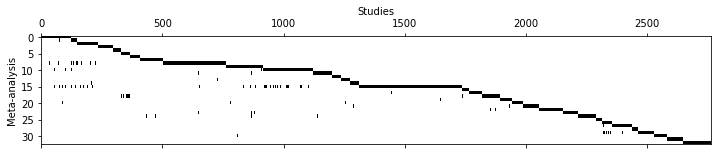

In [14]:
# build co-occurencen matrix
ucols = ['author','year','title']
dfall['ucol'] = ''
for ucol in ucols:
    dfall['ucol'] = dfall['ucol'] + dfall[ucol].map(str)
uvals = dfall['ucol'].unique()
print('Number of primary studies:', len(uvals))
umetas = dfall['pubid'].unique()
coo = np.zeros((len(uvals), dfall['pubid'].unique().shape[0]), dtype=bool)
for i, umeta in enumerate(umetas):
    ie = dfall['pubid'] == umeta
    coo[:,i] = np.in1d(uvals, dfall[ie]['ucol'].values)

fig, ax = plt.subplots(figsize=(12,2))
ax.matshow(coo.T, cmap='Greys')
ax.set_aspect('auto')
ax.set_ylabel('Meta-analysis')
ax.set_xlabel('Studies')
ax.xaxis.set_label_position('top')

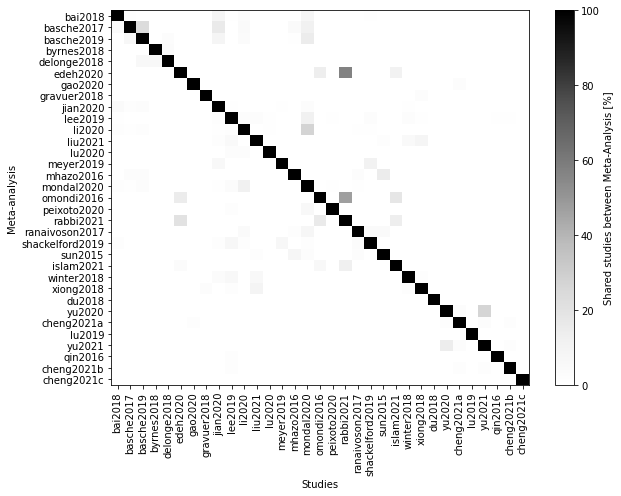

In [15]:
# shared references between meta-analysis
shared = np.zeros((len(umetas), len(umetas)))
sharedPrcRow = np.zeros(shared.shape)
sharedPrcCol = np.zeros(shared.shape)
for i, umeta in enumerate(umetas):
    for j, umeta in enumerate(umetas):
        shared[i,j] = np.sum(coo[:,i] & coo[:,j]) # number shared
        sharedPrcRow[i,j] = np.sum(coo[:,i] & coo[:,j])/np.sum(coo[:,i])*100 # percentage shared
        sharedPrcCol[i,j] = np.sum(coo[:,i] & coo[:,j])/np.sum(coo[:,j])*100 # percentage shared

fig, ax = plt.subplots(figsize=(9,7))
cax = ax.imshow(sharedPrcRow, cmap='Greys')
ax.set_aspect('auto')
ax.set_ylabel('Meta-analysis')
ax.set_xlabel('Studies')
ax.set_xticks(np.arange(len(umetas)))
ax.set_xticklabels(umetas, rotation=90)
ax.set_yticks(np.arange(len(umetas)))
ax.set_yticklabels(umetas)
fig.colorbar(cax, ax=ax, label='Shared studies between Meta-Analysis [%]')
fig.tight_layout()
fig.savefig(outputdir + 'shared-studies.jpg', dpi=500)

**Note** that the percentage are percentage of the studies in the rows (not in the columns) of the matrix. This means the the percentage are taken considering the number of studies shared and the total number of studies of the paper in the row.

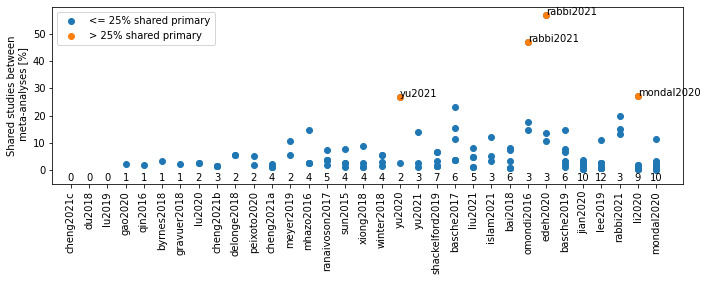

In [16]:
# Beillouin et al graph
# WARNING this is not a two way comparison! the percentage are refered to for the rows
fig, ax = plt.subplots(figsize=(10, 4))
xx = np.arange(len(umetas))
y = shared.copy()
y[y == 0] = np.nan
np.fill_diagonal(y, 0)
incommon = np.nansum(y, axis=0)
isort = np.argsort(incommon)

y = sharedPrcRow.copy()
y[y == 100] = np.nan
y[y <= 0] = np.nan # discard studies with less than 2% in common
counts = np.sum(~np.isnan(y), axis=1)
#isort = np.argsort(np.nanmin(y, axis=1))[::-1]
#isort = np.arange(len(umetas))
ax.plot(xx, y[isort,:], 'o', color='tab:blue')
for i in range(len(umetas)):
    for j in range(len(umetas)):
        if y[i,j] > 25:
            xpos = np.where(isort == i)[0][0]
            #print('{:14s} (x={:2d}) shared {:.1f}% of its primary studies with {:14s}'.format(
            #    umetas[i], xpos, y[i,j], umetas[j]))
            ax.plot(xpos, y[i,j], 'o', color='tab:orange')
            ax.text(xpos, y[i,j], umetas[j])
for i, count in enumerate(counts[isort]):
    ax.text(i, -4, count, ha='center')
ax.plot([], [], 'o', color='tab:blue', label='<= 25% shared primary')
ax.plot([], [], 'o', color='tab:orange', label='> 25% shared primary')
ax.legend()
ax.set_xticks(xx)
ax.set_xticklabels(umetas[isort], rotation=90)
ax.set_ylim([-5, None])
ax.set_xlim([-1, None])
ax.set_ylabel('Shared studies between\n meta-analyses [%]')
fig.tight_layout()
fig.savefig(outputdir + 'beillouin-shared.jpg', dpi=500)
# counts is the number of meta-analysis with which the MA in the xaxis shared references

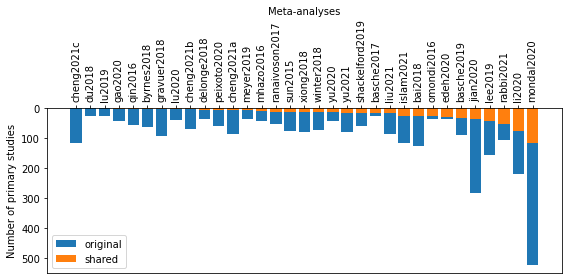

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))
y = shared.copy()
y[y == 0] = np.nan
np.fill_diagonal(y, 0)
incommon = np.nansum(y, axis=0)
nstudies = np.sum(coo, axis=0)
isort = np.argsort(incommon)
xx = np.arange(len(umetas))
ax.bar(xx, nstudies[isort], label='original', color='tab:blue')
ax.bar(xx, incommon[isort], label='shared', color='tab:orange')
ax.set_xticks(xx)
ax.set_xticklabels(umetas[isort], rotation=90)
ax.legend()
ax.set_xlabel('Meta-analyses')
ax.xaxis.set_label_position('top') 
ax.set_ylabel('Number of primary studies')
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.tight_layout()
fig.savefig(outputdir + 'bellouing-shared-hist.jpg', dpi=500)

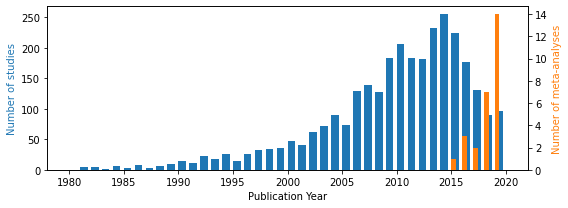

In [18]:
fig, ax = plt.subplots(figsize=(8, 3))
bins = np.arange(1980, 2021, 1)
# pvals, _ = np.histogram(dfall['year'], bins=bins)
# pvals = pvals / np.sum(pvals) * 100  # in percent
# ax.bar(bins[:-1] + 0.5, pvals, width=0.7, label='Primary studies')
# pvals, _ = np.histogram(dfref['Year'], bins=bins)
# pvals = pvals / np.sum(pvals) * 100  # in percent
# ax.bar(bins[:-1] + 0.5, pvals, width=0.7, label='Meta-analysis')
ax.hist(dfall['year'], bins=bins, width=0.7, color='tab:blue')
ax.set_xlabel('Publication Year')
# ax.set_ylabel('Percentage of studies [%]')
ax.set_ylabel('Number of studies', color='tab:blue')
#ax.legend()
#[ax.axvline(a) for a in dfref['Year']]
ax2 = ax.twinx()
ax2.hist(dfref['Year'], bins=bins, width=0.4, color='tab:orange')
ax2.set_ylabel('Number of meta-analyses', color='tab:orange')
fig.tight_layout()
fig.savefig(outputdir + 'hist-pub.jpg', dpi=500)